# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
import numpy as np
import pandas as pd


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

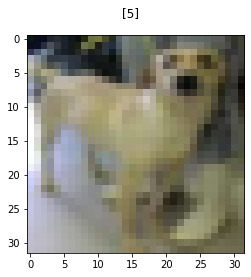

In [11]:
#Lets print the image as well
import matplotlib.pyplot as plt

img_num = np.random.randint(0,x_train.shape[0])
plt.imshow(x_train[img_num],cmap='gray')
plt.suptitle(str(y_train[img_num]))
plt.show()

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
x_train_norm = x_train/255
x_test_norm = x_test/255


In [13]:
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Dropout, MaxPool2D, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
img_size = 32
img_depth = 3

In [0]:
clear_session()
model = Sequential()
model.add(BatchNormalization(input_shape= (img_size,img_size,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        1

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [78]:
model.fit(x_train_norm, trainY,
                    epochs=10,
                    batch_size= 32,
                    validation_data=(x_test_norm,testY))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 387us/sample - loss: 1.2573 - accuracy: 0.5469 - val_loss: 0.9836 - val_accuracy: 0.6504
Epoch 2/10
50000/50000 [==============================] - 12s 233us/sample - loss: 0.9128 - accuracy: 0.6800 - val_loss: 0.8641 - val_accuracy: 0.6984
Epoch 3/10
50000/50000 [==============================] - 12s 232us/sample - loss: 0.7759 - accuracy: 0.7272 - val_loss: 0.7917 - val_accuracy: 0.7173
Epoch 4/10
50000/50000 [==============================] - 12s 234us/sample - loss: 0.6974 - accuracy: 0.7577 - val_loss: 0.7471 - val_accuracy: 0.7386
Epoch 5/10
50000/50000 [==============================] - 12s 237us/sample - loss: 0.6389 - accuracy: 0.7786 - val_loss: 0.6951 - val_accuracy: 0.7551
Epoch 6/10
50000/50000 [==============================] - 12s 241us/sample - loss: 0.5951 - accuracy: 0.7919 - val_loss: 0.6761 - val_accuracy: 0.7725
Epoch 7/10
50000/50000 [====================

In [127]:
train_score1 = model.evaluate(x_train_norm,trainY)
test_score1 = model.evaluate(x_test_norm,testY)

print('training score of model: ',train_score1)
print('testing score of model: ',test_score1)


10000/10000 [==============================] - 1s 118us/sample - loss: 0.6554 - accuracy: 0.7821
training score of model:  [0.44838281264305113, 0.84302]
testing score of model:  [0.6553584187984467, 0.7821]


In [0]:
img_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True,
                                   )


train_generator=img_generator.fit(x_train_norm)
test_generator=img_generator.fit(x_test_norm)

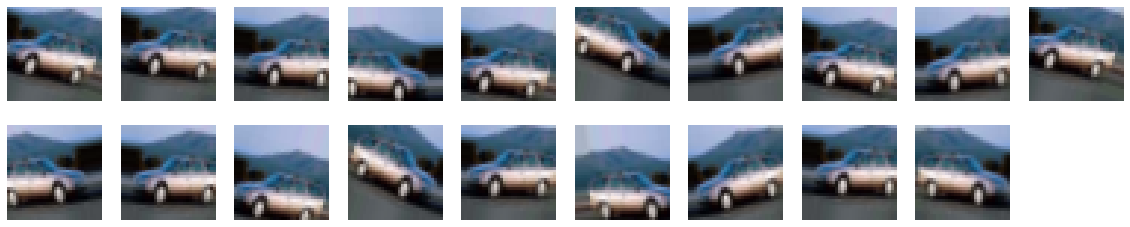

In [67]:
from matplotlib import pyplot as plt
gen = img_generator.flow(x_train_norm[4:5], batch_size=1)
plt.figure(figsize=(20,4))
   
for i in range(1, 20):
    plt.subplot(2,10,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [73]:
model.fit(train_generator, train_y,
                    epochs=10,
                    batch_size= 32,
                    validation_data=(test_generator,test_y))



ValueError: ignored

In [70]:
type(testY)

numpy.ndarray

In [0]:
train_y = np.asarray(trainY)
test_y = np.asarray(testY)

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [55]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#img = tf.keras.preprocessing.image.load_img('/gdrive/My Drive/Colab Notebooks/Residency8_internallab/images.zip')
from zipfile import ZipFile
with ZipFile('/gdrive/My Drive/Colab Notebooks/Residency8_internallab/images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
     zipObj.extractall()

In [0]:
img1= load_img('/content/images/49436743043_2441587ab9_c.jpg')
img2= load_img('/content/images/49438170746_8378201627_c.jpg')
img3 = load_img('/content/images/49441887332_107afa786d_c.jpg')
img4= load_img('/content/images/4994221690_d070e8a355_c.jpg')

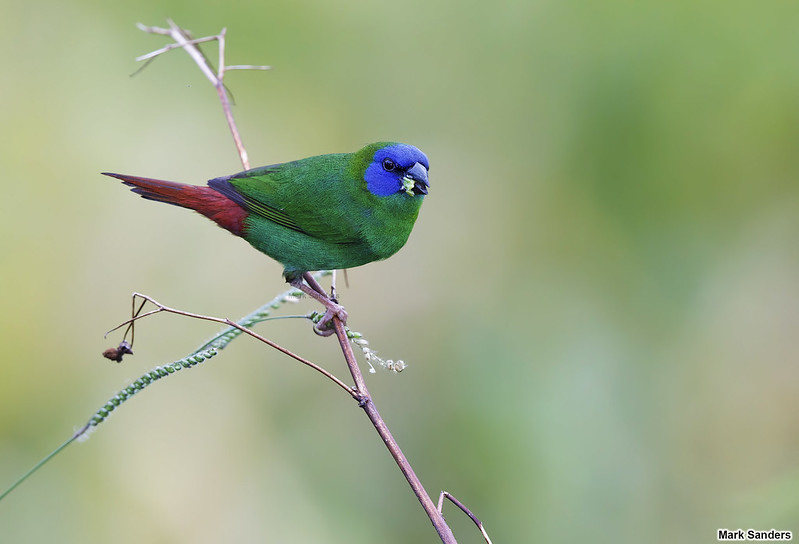

In [90]:
img1

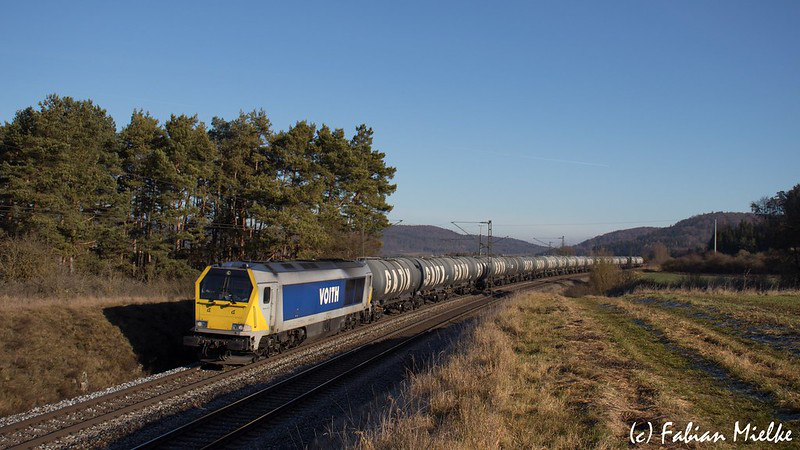

In [91]:
img2

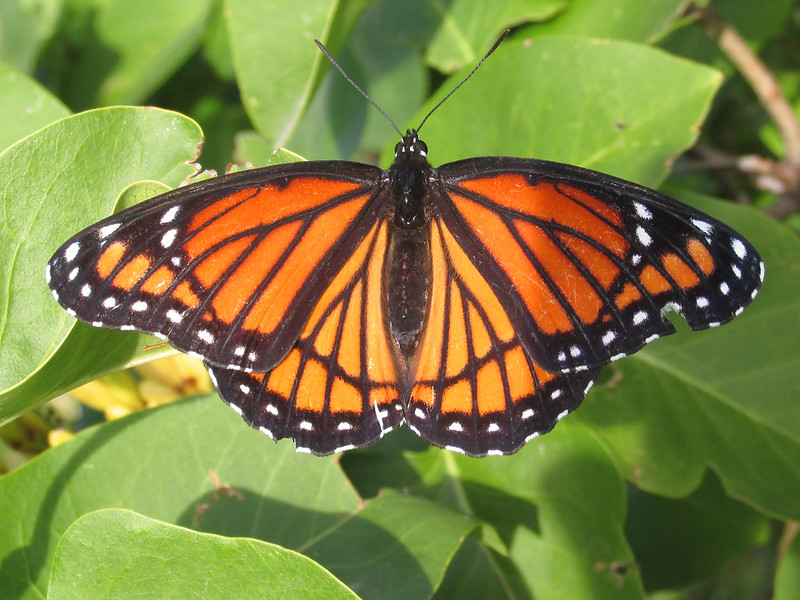

In [92]:
img3

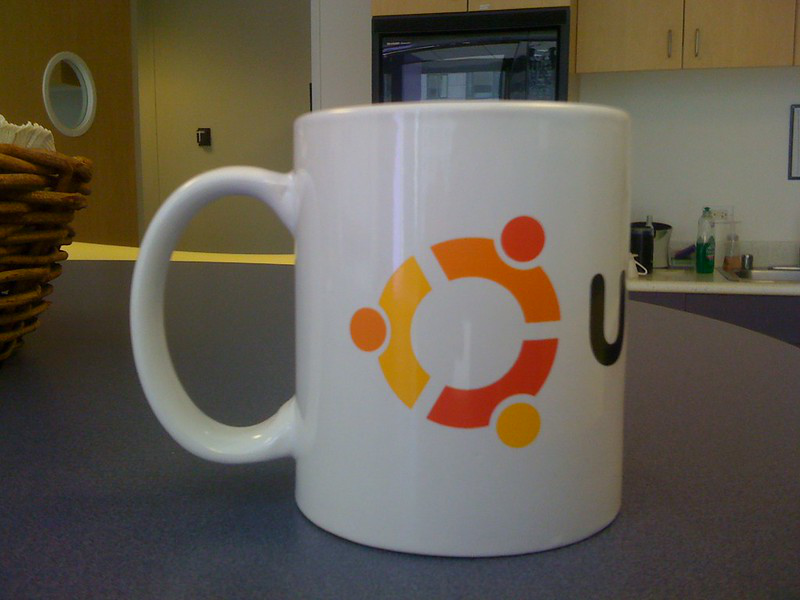

In [93]:
img4

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [0]:
def predict_image (img):
#Prepare Input 
#VGG takes 224x224 image
    model_input = img.resize((224,224))
    model_input = tf.keras.preprocessing.image.img_to_array(model_input)

    #Image array should be normalized in same way as was done for VGG training
    model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

    #Add a dimension to input data to make it a 4D input as required by model
    model_input = np.expand_dims(model_input, axis=0)
    print('img size: ', model_input.shape)

    #Load VGG Model
    vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

    #Predict
    prediction = vgg.predict(model_input)
    prediction.shape
    #Prediction Class
    print(np.argmax(prediction[0]))
    pred=tf.keras.applications.vgg16.decode_predictions(prediction)[0][0]
    print('%s (%.2f%%)' % (pred[1], pred[2]*100))


Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [119]:
predict_image(img1)

img size:  (1, 224, 224, 3)
94
hummingbird (36.53%)


In [120]:
predict_image(img2)

img size:  (1, 224, 224, 3)
565
freight_car (34.34%)


In [121]:
predict_image(img3)

img size:  (1, 224, 224, 3)
323
monarch (99.72%)


In [122]:
predict_image(img4)

img size:  (1, 224, 224, 3)
504
coffee_mug (75.90%)


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
tweets = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Residency8_internallab/tweets.csv',encoding='latin')

**Drop null values**

*   Drop all the rows with null values




In [152]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


In [153]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [0]:
tweets.dropna(inplace=True)

In [155]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3291 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3291 non-null object
dtypes: object(3)
memory usage: 102.8+ KB


**Print the dataframe**
*   print initial 5 rows of the data


In [156]:
tweets.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re


In [0]:
for column in tweets:
  tweets[column] = tweets[column].apply(lambda s: s.lower())
  tweets[column] = tweets[column].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
  tweets[column] = tweets[column].apply(lambda s: s.strip())
  

## Question 3

In [162]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [163]:
tweets[tweets['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion']

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion
7,#sxsw is just starting #ctia is around the cor...,android,positive emotion
8,beautifully smart and simple idea rt madebyman...,ipad or iphone app,positive emotion
...,...,...,...
9072,mention your iphone 4 cases are rad and ready ...,iphone,positive emotion
9077,mention your pr guy just convinced me to switc...,iphone,positive emotion
9079,quotpapyrussort of like the ipadquot nice lol...,ipad,positive emotion
9085,ive always used camera+ for my iphone bc it ha...,ipad or iphone app,positive emotion


In [164]:
tweets[tweets['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion']

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
17,i just noticed dst is coming this weekend how ...,iphone,negative emotion
38,mention false alarm google circles not comin...,google,negative emotion
67,attending mention ipad design headaches #sxsw ...,ipad,negative emotion
...,...,...,...
8930,#ipad #news #apps not popular with the #kids l...,ipad or iphone app,negative emotion
8943,hmmmtaxi magic on iphone does not appear to be...,ipad or iphone app,negative emotion
8981,i think my effing hubby is in line for an #ipa...,ipad,negative emotion
9008,im pretty sure the panelist that thinks quotap...,apple,negative emotion


In [170]:
print('positive emotion row count: ', tweets[tweets['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion']['tweet_text'].count())

positive emotion row count:  2672


In [171]:
print('negative emotion row count: ', tweets[tweets['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion']['tweet_text'].count())

negative emotion row count:  519


##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [185]:
tweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i cant tell                              9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
tweets=tweets[(tweets['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion' )|(tweets['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') ]

In [189]:
tweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [191]:
# convert label to a numerical variable
tweets['label1'] = tweets.is_there_an_emotion_directed_at_a_brand_or_product.map({'negative emotion':0, 'positive emotion':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,label,label1
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion,0,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion,1,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion,1,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion,0,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion,1,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [193]:
X = tweets.tweet_text
y = tweets.label
print(X.shape)
print(y.shape)

(3191,)
(3191,)


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2), stop_words='english', min_df =2)
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [196]:
X_train_dtm

<2393x5562 sparse matrix of type '<class 'numpy.int64'>'
	with 37558 stored elements in Compressed Sparse Row format>

In [197]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [180]:
X_test_dtm

<823x5659 sparse matrix of type '<class 'numpy.int64'>'
	with 10805 stored elements in Compressed Sparse Row format>

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [199]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [201]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [203]:
y_pred_class = logreg.predict(X_test_dtm)
y_pred_class

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [205]:
y_pred_class_nb = nb.predict(X_test_dtm)
y_pred_class_nb

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [206]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8734335839598998

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [207]:
metrics.accuracy_score(y_test, y_pred_class_nb)

0.8609022556390977

In [208]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

5562

In [209]:
X_train_tokens

['10',
 '10 attendees',
 '10 hot',
 '100',
 '101',
 '105',
 '105 hours',
 '10x',
 '11',
 '12',
 '12 months',
 '136',
 '136 google',
 '1413',
 '14day',
 '14day return',
 '15',
 '15 minute',
 '15 minutes',
 '150',
 '150 million',
 '1986',
 '1st',
 '1st prize',
 '20',
 '20 min',
 '2010',
 '2011',
 '2011 computing',
 '2011 link',
 '2011 mention',
 '2011 novelty',
 '2011 weekend',
 '21',
 '247',
 '247 amp',
 '247 stream',
 '2day',
 '2nd',
 '2nd place',
 '2nd prize',
 '2quot',
 '2quot mention',
 '2s',
 '2s austin',
 '2s come',
 '2s sxsw',
 '30',
 '30 android',
 '313',
 '32gb',
 '330',
 '36',
 '37',
 '3d',
 '3d buildings',
 '3d rendering',
 '3d xml',
 '3g',
 '3g 64gb',
 '3g 64mb',
 '3g ipad',
 '3g iphone',
 '3gs',
 '40',
 '40 google',
 '40 users',
 '4chan',
 '4g',
 '4g austin',
 '4sq',
 '4sq sxsw',
 '4square',
 '50',
 '52',
 '52 looks',
 '5pm',
 '5pm tomorrow',
 '64gb',
 '64gb wifi',
 '64gig',
 '64gig wifi',
 '64mb',
 '64mb apple',
 '65',
 '654',
 '654 link',
 '6th',
 '6th amp',
 '6th congres